In [ ]:
# DATA PREPROCESING BLOCK

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

df = pd.read_csv("telecom_customer_churn.csv")

# 2 feature
X = df[['Monthly Charge', 'Tenure in Months']].dropna()
y = LabelEncoder().fit_transform(df.loc[X.index, 'Customer Status'])

# Train - Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

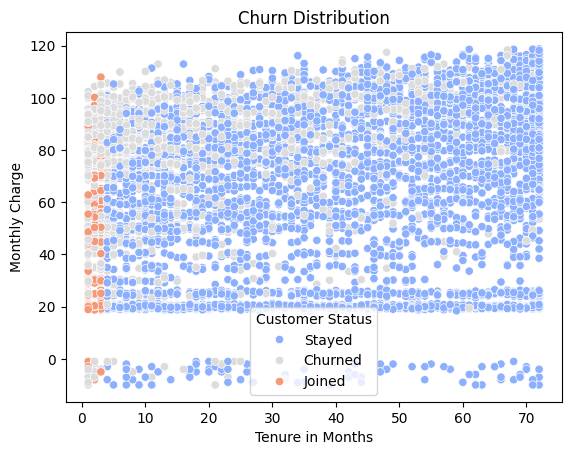

In [ ]:
# EDA

import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=df, x='Tenure in Months', y='Monthly Charge', hue='Customer Status', palette='coolwarm')
plt.title('Churn Distribution')
plt.show()

In [ ]:
# VALUE OF CHURN,JOINED,STAYED

le = LabelEncoder()
y = le.fit_transform(df.loc[X.index, 'Customer Status'])
print(dict(zip(le.classes_, le.transform(le.classes_))))

{'Churned': np.int64(0), 'Joined': np.int64(1), 'Stayed': np.int64(2)}


In [ ]:
# MODEL TRAINING

from sklearn.svm import SVC
model = SVC(kernel='rbf')
model.fit(X_train, y_train)

SVC()

Accuracy: 0.7764371894960965


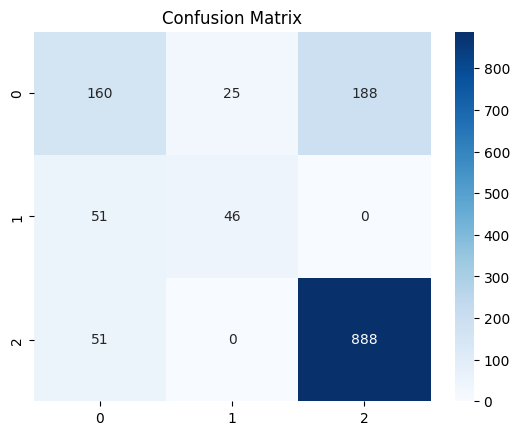

In [ ]:
# RESULT

from sklearn.metrics import accuracy_score, confusion_matrix

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()